<a href="https://colab.research.google.com/github/Laura-VFA/DataMining-21-22/blob/main/DM_Entrega3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!rm *.*

!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/agroanalisis_recolec.csv


--2021-12-29 18:05:22--  https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/agroanalisis_recolec.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2241493 (2.1M) [text/plain]
Saving to: ‘agroanalisis_recolec.csv’

agroanalisis_recole 100%[===================>]   2.14M  --.-KB/s    in 0.06s   

2021-12-29 18:05:22 (34.9 MB/s) - ‘agroanalisis_recolec.csv’ saved [2241493/2241493]



In [13]:
import pandas as pd

In [14]:
agroanalisis = pd.read_csv('agroanalisis_recolec.csv', sep=';')
agroanalisis.drop(axis=1, labels=['Unnamed: 0'], inplace=True)
agroanalisis.head()

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Min siem-recol,Max siem-recol,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda,distancia_mes_inicio_siem,distancia_mes_fin_siem
0,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.26,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-8.0,-10.0
1,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.26,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-2.0,-4.0
2,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.68,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-7.0,-9.0
3,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.68,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-1.0,-3.0
4,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.90,2.0,3,3,6.0,33.0,15.0,25.0,4,10,-6.0,-8.0


In [15]:
# Construir el campo objetivo 

for index1 in agroanalisis.index:
  if agroanalisis.at[index1, 'distancia_mes_inicio_siem'] >= 0 and agroanalisis.at[index1,'distancia_mes_fin_siem'] <= 0:
    interval = range(agroanalisis.at[index1,'Min siem-recol'],agroanalisis.at[index1,'Max siem-recol']+1)
    prices = []
    for year, month in map(lambda delta: (agroanalisis.at[index1,'YEAR'] if agroanalisis.at[index1,'MONTH']+delta <=12 else agroanalisis.at[index1,'YEAR']+1, (agroanalisis.at[index1,'MONTH']+delta) % 12), interval):
      result = agroanalisis[(agroanalisis['product'] == agroanalisis.at[index1,'product']) & \
                   (agroanalisis['origen'] == agroanalisis.at[index1,'origen']) & \
                   (agroanalisis['YEAR'] == year) & (agroanalisis['MONTH'] == month)]
      for index2 in result.index:
          prices.append((result.at[index2,'price_mean'], result.at[index2,'MONTH']))
    if prices:
      agroanalisis.at[index1, 'price_max_recolec'], agroanalisis.at[index1, 'MONTH_max_recolec'] = max(prices)

In [16]:
agroanalisis.head(10)

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Min siem-recol,Max siem-recol,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda,distancia_mes_inicio_siem,distancia_mes_fin_siem,price_max_recolec,MONTH_max_recolec
0,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.26,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-8.0,-10.0,NaN,NaN
1,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.26,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-2.0,-4.0,NaN,NaN
2,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.68,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-7.0,-9.0,NaN,NaN
3,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.68,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-1.0,-3.0,NaN,NaN
4,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.90,2.0,3,3,6.0,33.0,15.0,25.0,4,10,-6.0,-8.0,NaN,NaN
5,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.90,2.0,3,3,6.0,33.0,15.0,25.0,4,10,0.0,-2.0,1.035714,6.0
6,ACELGA,Andalucia,2018,4,0.666176,64277.0,14.84,1.0,3,3,6.0,33.0,15.0,25.0,4,10,-5.0,-7.0,NaN,NaN
7,ACELGA,Andalucia,2018,4,0.666176,64277.0,14.84,1.0,3,3,6.0,33.0,15.0,25.0,4,10,1.0,-1.0,0.725000,7.0
8,ACELGA,Andalucia,2018,5,0.869608,94592.0,17.50,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-4.0,-6.0,NaN,NaN
9,ACELGA,Andalucia,2018,5,0.869608,94592.0,17.50,0.0,3,3,6.0,33.0,15.0,25.0,4,10,2.0,0.0,0.529167,8.0


In [17]:
# Eliminar las filas que no estan en su periodo de siembra
agroanalisis.dropna(inplace=True)
agroanalisis.shape

(3822, 20)

In [18]:
# Comprobar que por cada año mes producto y region hay solo una fila (hay varios periodos de siembra solapados)
agroanalisis.groupby(['product', 'origen','YEAR', 'MONTH'], as_index=False).count()


,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Min siem-recol,Max siem-recol,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda,distancia_mes_inicio_siem,distancia_mes_fin_siem,price_max_recolec,MONTH_max_recolec
0,ACELGA,Andalucia,2018,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,ACELGA,Andalucia,2018,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,ACELGA,Andalucia,2018,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,ACELGA,Andalucia,2018,10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,ACELGA,Andalucia,2018,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,ZANAHORIA,Valencia,2019,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3818,ZANAHORIA,Valencia,2020,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3819,ZANAHORIA,Valencia,2020,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3820,ZANAHORIA,Valencia,2020,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
#agroanalisis = agroanalisis[(agroanalisis['temperatura'] >= agroanalisis['Temperatura min req']) \
#                            & (agroanalisis['temperatura'] <= agroanalisis['Temperatura max req'])]

In [20]:
#agroanalisis

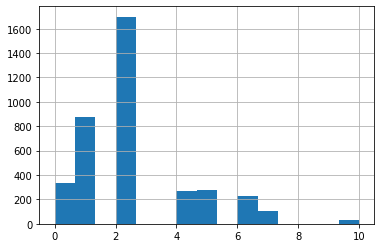

In [25]:
# Discretizar necesidades de humedad
agroanalisis['Dias entre riego zona seca'].hist(bins=15)

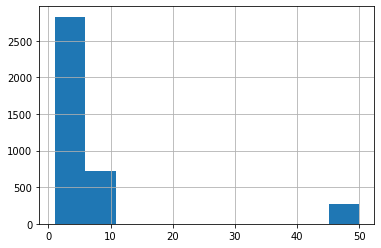

In [24]:
agroanalisis['Dias entre riego zona húmeda'].hist()

In [26]:
# las nnecesidades de riego en zonas humedas son redundantes :/
for index in agroanalisis.index:
  if agroanalisis.at[index, 'Dias entre riego zona seca'] < 2:
    val = 2
  elif agroanalisis.at[index, 'Dias entre riego zona seca'] < 4:
    val = 1
  else:
    val = 0
  agroanalisis.at[index, 'need_humidity_group'] = val

In [32]:
agroanalisis.drop(axis=1, labels=['Dias entre riego zona seca', 'Dias entre riego zona húmeda', 'Min siem-recol', 'Max siem-recol'])

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,distancia_mes_inicio_siem,distancia_mes_fin_siem,price_max_recolec,MONTH_max_recolec,need_humidity_group
5,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.90,2.0,6.0,33.0,15.0,25.0,0.0,-2.0,1.035714,6.0,0.0
7,ACELGA,Andalucia,2018,4,0.666176,64277.0,14.84,1.0,6.0,33.0,15.0,25.0,1.0,-1.0,0.725000,7.0,0.0
9,ACELGA,Andalucia,2018,5,0.869608,94592.0,17.50,0.0,6.0,33.0,15.0,25.0,2.0,0.0,0.529167,8.0,0.0
18,ACELGA,Andalucia,2018,10,0.647222,44935.0,18.05,1.0,6.0,33.0,15.0,25.0,1.0,-1.0,0.880000,1.0,0.0
20,ACELGA,Andalucia,2018,11,0.750000,87490.0,13.19,1.0,6.0,33.0,15.0,25.0,2.0,0.0,0.682381,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22491,BROCOLI,Castilla Leon,2020,6,1.395147,218750.0,16.96,0.0,15.0,25.0,16.0,18.0,0.0,-2.0,1.953175,9.0,1.0
22523,BROCOLI,Galicia,2020,6,1.448044,344550.0,16.84,0.0,15.0,25.0,16.0,18.0,0.0,-2.0,2.200000,9.0,1.0
22527,COLIFLOR,Galicia,2020,6,1.686079,27700.0,16.84,0.0,5.0,25.0,15.0,21.0,0.0,-2.0,2.500000,9.0,0.0
22574,BROCOLI,Pais Vasco,2020,6,1.838156,192980.0,17.36,1.0,15.0,25.0,16.0,18.0,0.0,-2.0,1.700000,9.0,1.0


In [31]:
# Probamos a filtrar en funcion de la precipitacion y la  humedá que necesita er cultivo
#agroanalisis[agroanalisis['Precipitacion_group'] - agroanalisis['need_humidity_group'] <= 1]
#agroanalisis[agroanalisis['Precipitacion_group'] == agroanalisis['need_humidity_group']]

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Min siem-recol,Max siem-recol,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda,distancia_mes_inicio_siem,distancia_mes_fin_siem,price_max_recolec,MONTH_max_recolec,need_humidity_group
9,ACELGA,Andalucia,2018,5,0.869608,94592.0,17.50,0.0,3,3,6.0,33.0,15.0,25.0,4,10,2.0,0.0,0.529167,8.0,0.0
29,ACELGA,Andalucia,2019,3,0.587698,117495.0,14.28,0.0,3,3,6.0,33.0,15.0,25.0,4,10,0.0,-2.0,0.450000,6.0,0.0
33,ACELGA,Andalucia,2019,5,0.543333,51584.0,20.40,0.0,3,3,6.0,33.0,15.0,25.0,4,10,2.0,0.0,0.462500,8.0,0.0
42,ACELGA,Andalucia,2019,10,0.883333,4400.0,19.21,0.0,3,3,6.0,33.0,15.0,25.0,4,10,1.0,-1.0,0.707955,1.0,0.0
57,ACELGA,Andalucia,2020,5,0.812500,3102.0,20.36,0.0,3,3,6.0,33.0,15.0,25.0,4,10,2.0,0.0,0.550000,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22364,SANDIA,Baleares,2020,5,0.819897,1015960.0,19.81,0.0,4,4,15.0,35.0,21.0,35.0,5,50,2.0,0.0,0.585714,9.0,0.0
22370,SANDIA,Extremadura,2020,5,0.826509,1584040.0,19.76,0.0,4,4,15.0,35.0,21.0,35.0,5,50,2.0,0.0,0.633333,9.0,0.0
22376,SANDIA,Madrid,2020,5,0.886018,7119240.0,17.48,0.0,4,4,15.0,35.0,21.0,35.0,5,50,2.0,0.0,0.570588,9.0,0.0
22527,COLIFLOR,Galicia,2020,6,1.686079,27700.0,16.84,0.0,3,3,5.0,25.0,15.0,21.0,6,8,0.0,-2.0,2.500000,9.0,0.0
